In [1]:
pip install bcchapi

In [2]:
import bcchapi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import xml.etree.ElementTree as ET

In [4]:
siete = bcchapi.Siete("usuario", "contraseña")#aca va tu usuario o contraseña de la pagina del banco central o la vinculación a archivo txt de eso mismo

In [5]:
df = siete.cuadro(
  series=["F073.UFF.PRE.Z.D"],
  nombres = ["UF al dia"],
  desde="2020-01-01",
  hasta="2025-05-12",
  variacion=0,
  frecuencia="D",
  observado={"UF al dia": "last"}
)


In [6]:
df

,UF al dia
2020-01-01,28310.86
2020-01-02,28311.77
2020-01-03,28312.68
2020-01-04,28313.60
2020-01-05,28314.51
...,...
2025-05-08,39127.41
2025-05-09,39133.92
2025-05-10,39136.44
2025-05-11,39138.96


In [7]:
df = df.reset_index()
df.rename(columns={"index":"fecha"}, inplace=True)

In [8]:
df.to_excel("uf.xlsx", index=False)

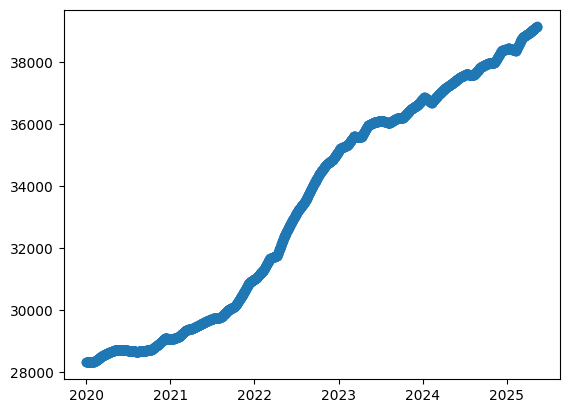

In [9]:
plt.scatter(df["fecha"], df["UF al dia"])
plt.show()

In [10]:
!pip install plotly

In [11]:
import plotly.express as px

# Suponemos que ya tienes tu df real cargado con columnas 'fecha' y 'UF al dia'
# Si no, reemplaza con tu DataFrame real cargado desde API o archivo

fig = px.line(df, x="fecha", y="UF al dia",
              title="Evolución diaria real de la UF (Unidad de Fomento)",
              labels={"fecha": "Fecha", "UF al dia": "UF en CLP"},
              markers=True)

# Personalización pro
fig.update_traces(line=dict(color='orange', width=3),
                  marker=dict(size=6, color='royalblue', line=dict(width=1, color='black')))
fig.update_layout(
    title_font_size=24,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    legend=dict(font=dict(size=12), bgcolor="rgba(0,0,0,0)"),
    template='plotly_white'
)

fig.show()
